# Matrix Factorization

## Loading classes

In [2]:
import sys
import os
current = os.getcwd()
parent = os.path.dirname(current)
if parent not in sys.path:
    sys.path.append(parent)
from utils import split_data
import pandas as pd
from NonNegativeMatrixFactorization import NonNegativeMatrixFactorization as nmf
import matplotlib.pyplot as plt
import numpy as np



## Loading Data


In [3]:
# loading the dataset
R = pd.read_csv('ratings.csv')
# transforming into a matrix
R = R.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
R = R.values
# making it a binary matrix
R[R > 0] = 1


## Splitting data

In [4]:
R, test_val_sets = split_data(R,0.3)

## Choosing the right number of Latent features

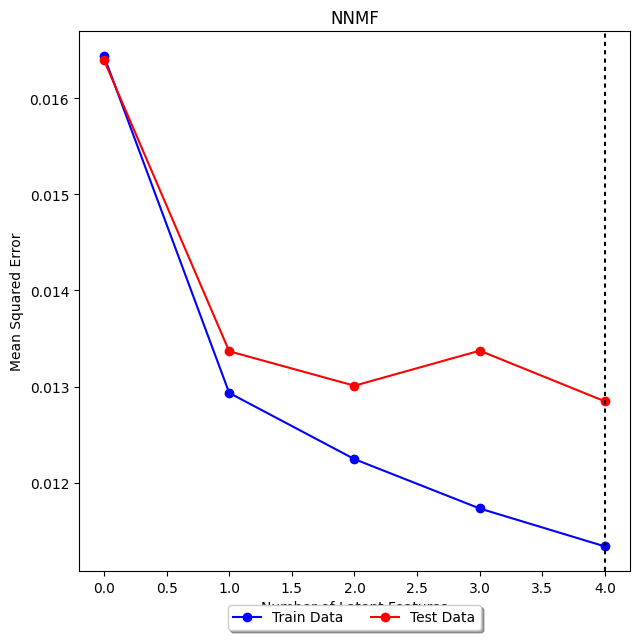

In [5]:
k=nmf.plot_pca(R,5,0.2,max_iteration=25,nonneg=True)


## Creating latent space matrix

In [6]:
import warnings

warnings.filterwarnings("ignore", message="Mean of empty slice")
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide")

#setting a mask full of ones 
M = np.ones_like(R, dtype=bool)
D, *_, diff_U_list = nmf.cv_mf(R,rank=k,nonneg=True,max_iterations=25,M=M)

### checking for convergence

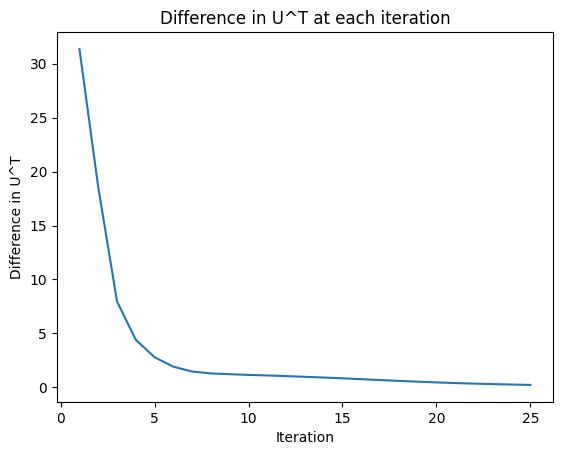

In [7]:
# plotting differences at each iteration
plt.plot(range(1, 25 + 1), diff_U_list)
plt.xlabel('Iteration')
plt.ylabel('Difference in U^T')
plt.title('Difference in U^T at each iteration')
plt.show()

### saving the obtained matrix

In [8]:
# saving matrix as csv
np.savetxt('user_latent_matrix_mf.csv', D, delimiter=',')